### Data Analysis With MatPlotLib

### Case : Supermarket Sales Analysis using Matplotlib

This notebook demonstrates how to create visualizations using the **matplotlib** library. We use a sample dataset of supermarket sales to generate the following plots:

1. Total Sales by Product Line  
2. Average Rating by Product Line  
3. Gender Distribution  
4. Sales by City  
5. Sales Trend Over Time  
6. Payment Method Distribution

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Datasets

In [2]:
excel_file = 'supermarket_sales.xlsx'

df = pd.read_excel(excel_file)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df['Hour'] = pd.to_datetime(df['Time'], format = '%H:%M:%S', errors = 'coerce').dt.hour
df['Hour']

,Hour
0,13
1,10
2,13
3,20
4,10
...,...
995,13
996,17
997,13
998,15


### Basic Dataset Inspection

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,3.186857


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(1000, 18)

In [9]:
print(f' Rows: {df.shape[0]}\nColumns: {df.shape[1]}')
print('----------------------------------------------')
print(f"Data Range: {df['Date'].min()} to {df['Date'].max()}")
print('----------------------------------------------')
print(f'Unique Values in a table: {df.nunique()}')

 Rows: 1000
Columns: 18
----------------------------------------------
Data Range: 2019-01-01 00:00:00 to 2019-03-30 00:00:00
----------------------------------------------
Unique Values in a table: Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
Hour                         11
dtype: int64


### Recall Duplicates

In [10]:
row1 = df.head(1)

row1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13


In [11]:
dup_test = pd.concat([row1, row1])
dup_test

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13


In [12]:
test = dup_test.duplicated()
test

,0
0,False
0,True


In [13]:
test.iloc[0] == 0

np.True_

In [14]:

dup_test.duplicated().sum()

np.int64(1)

### Descriptive Statistics

In [15]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


        Buisness Questions:
        Total Sales
        Total Sales by City
        Total Sales by Gender
        Total Sales by Product line
        Total Sales by Payment Method

### Mathematics

### Total Sales

In [16]:
Tsales = df['Total'].sum()
Tsales

np.float64(322966.749)

### Total Sales by City

In [17]:
Csales = df.pivot_table(
    index = 'City',
    values = 'Total',
    aggfunc = 'sum'
)
Csales

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


In [18]:
df.groupby('City')['Total'].sum()

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


### Total Sales by Gender

In [19]:
Gsales = df.pivot_table(
    index = 'Gender',
    values = 'Total',
    aggfunc = 'sum'
)

Gsales

,Total
Gender,
Female,167882.925
Male,155083.824


### Total Sales by Product Line

In [20]:
Psales = df.pivot_table(
    index = 'Product line',
    values = 'Total',
    aggfunc = 'sum'
)

Psales

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


### Total Sales by Payment Method

In [21]:
PMsales = df.pivot_table(
    index = 'Payment',
    values = 'Total',
    aggfunc = 'sum'
)

PMsales

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


### Visualization Relating to Sales

Sort for better visualization result

In [22]:
csales = Csales['Total'].sort_values(ascending = False)
gsales = Gsales['Total'].sort_values(ascending = False)
psales = Psales['Total'].sort_values(ascending = False)
pmsales = PMsales['Total'].sort_values(ascending = False)

In [23]:
display(csales, gsales, psales, pmsales)

,Total
City,
Naypyitaw,110568.7065
Yangon,106200.3705
Mandalay,106197.6720


,Total
Gender,
Female,167882.925
Male,155083.824


,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


,Total
Payment,
Cash,112206.570
Ewallet,109993.107
Credit card,100767.072


In [24]:
fig = plt.figure(figsize = (14, 10), layout = 'constrained')

gs = fig.add_gridspec(nrows = 3, ncols = 4, height_ratios = [1, 3, 3])

<Figure size 1400x1000 with 0 Axes>

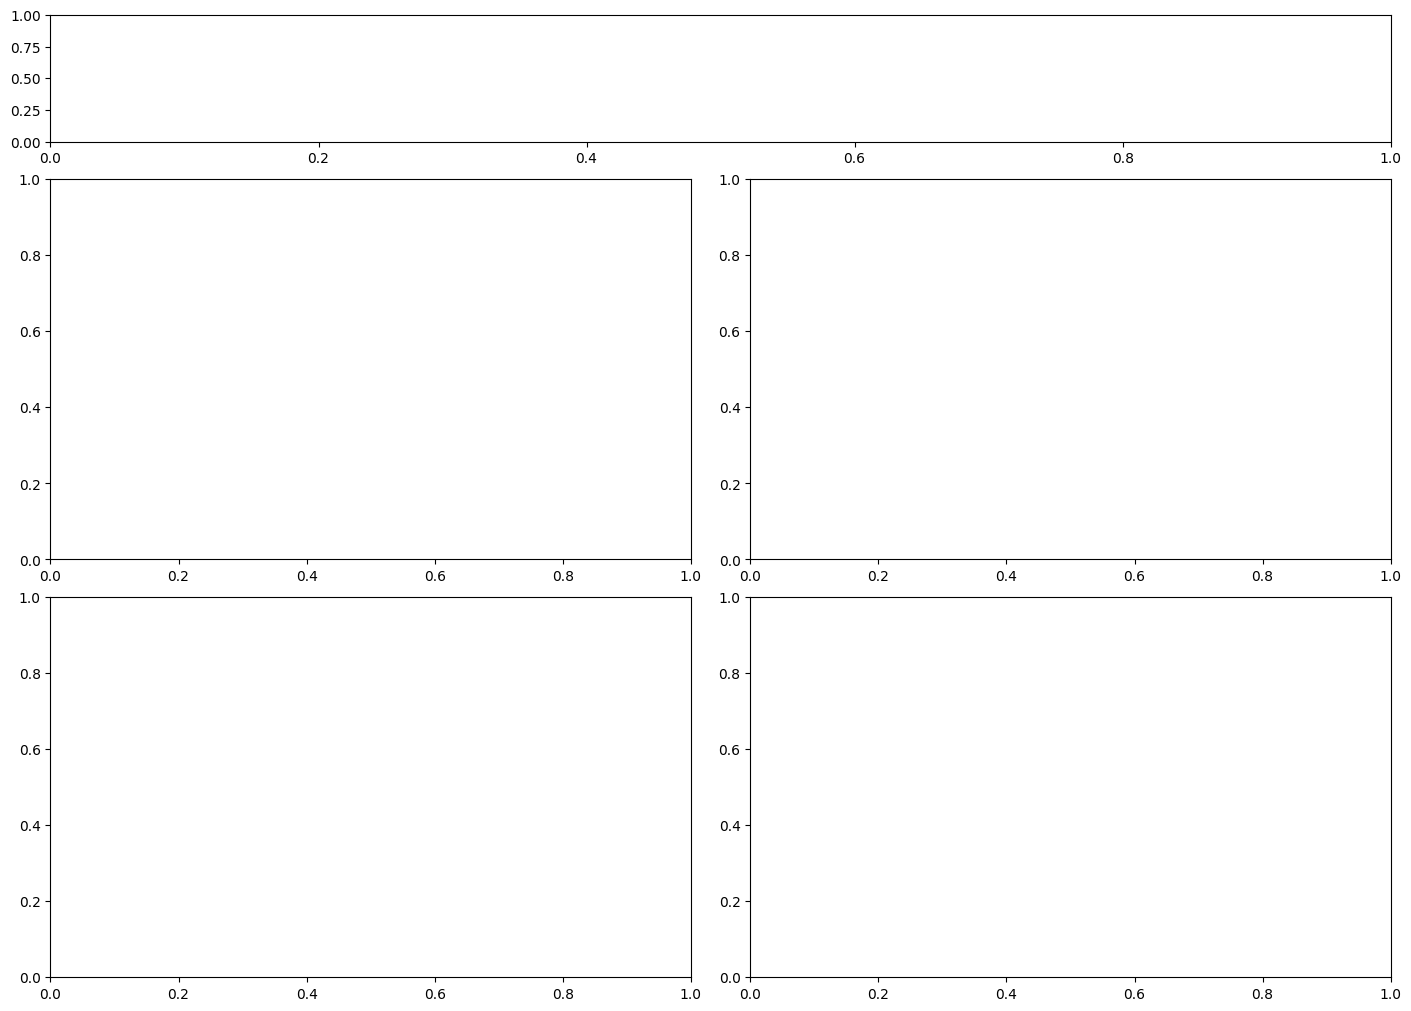

In [25]:
#top
ax_kpi = fig.add_subplot(gs[0, :])

#mid
ax_city = fig.add_subplot(gs[1, :2])
ax_gender = fig.add_subplot(gs[1, 2:])

#bottom
ax_prod = fig.add_subplot(gs[2, :2])
ax_pay = fig.add_subplot(gs[2, 2:])

fig

In [26]:
ax_kpi.text(0.5, 0.65, 'Total Sales', ha = 'center', va = 'center', fontsize = 16, fontweight = 'bold')
ax_kpi.text(0.5, 0.25, f'{df["Total"].sum():,.2f}', ha = 'center',va = 'center', fontsize = 28, color = 'green')

Text(0.5, 0.25, '322,966.75')

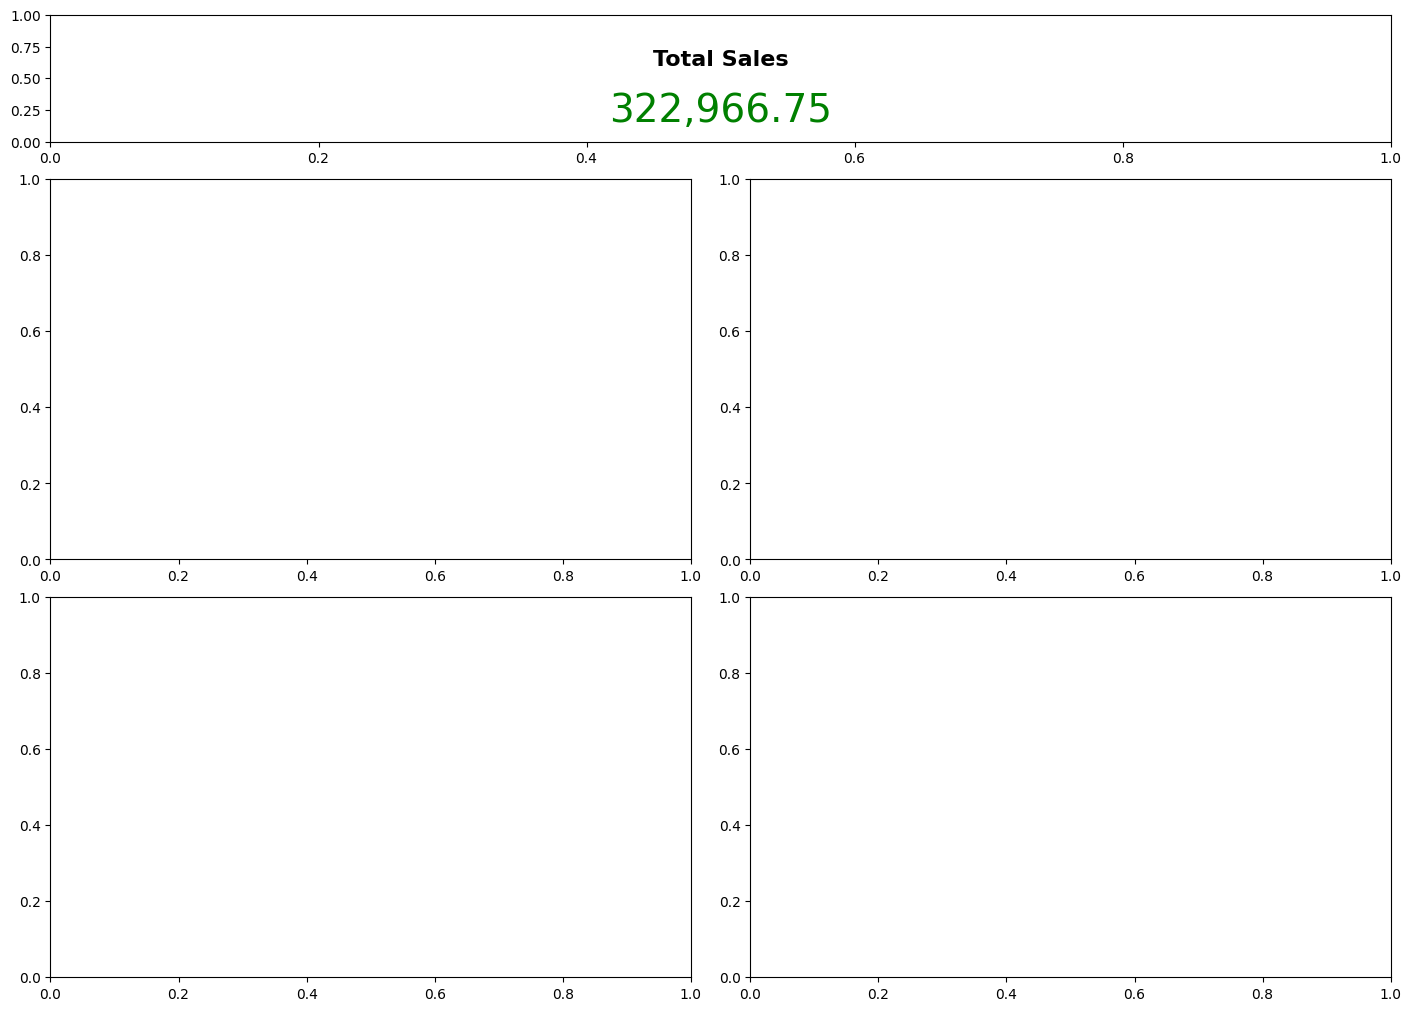

In [27]:
fig

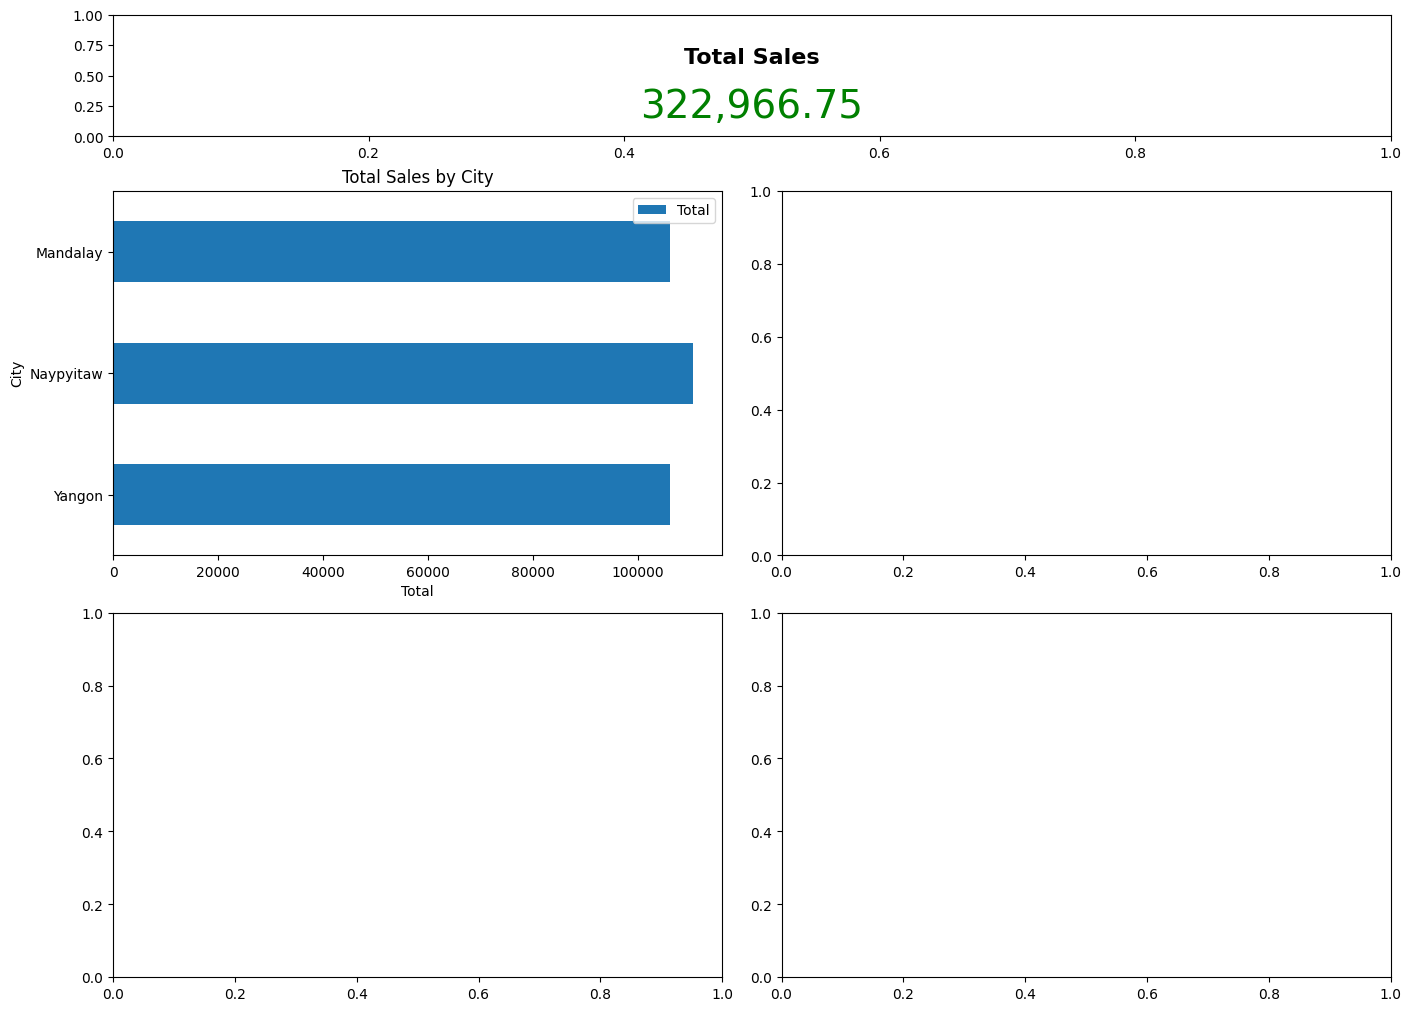

In [28]:
Csales.plot(kind = 'barh', ax = ax_city)
ax_city.invert_yaxis()
ax_city.set_title('Total Sales by City')
ax_city.set_ylabel('City')
ax_city.set_xlabel('Total')
ax_city.margins(x = 0.05)
fig

In [29]:
Gsales.ndim()

TypeError: 'int' object is not callable

In [30]:
Gsales = df.pivot_table(
    index = 'Gender',
    values = 'Total',
    aggfunc = 'sum'
).squeeze()

In [31]:
ax_gender.pie(Gsales.values, labels = Gsales.index, startangle = 90)


ax_gender.set_title('Total Sales for Gender')
ax_gender.margins(x = 0.05)

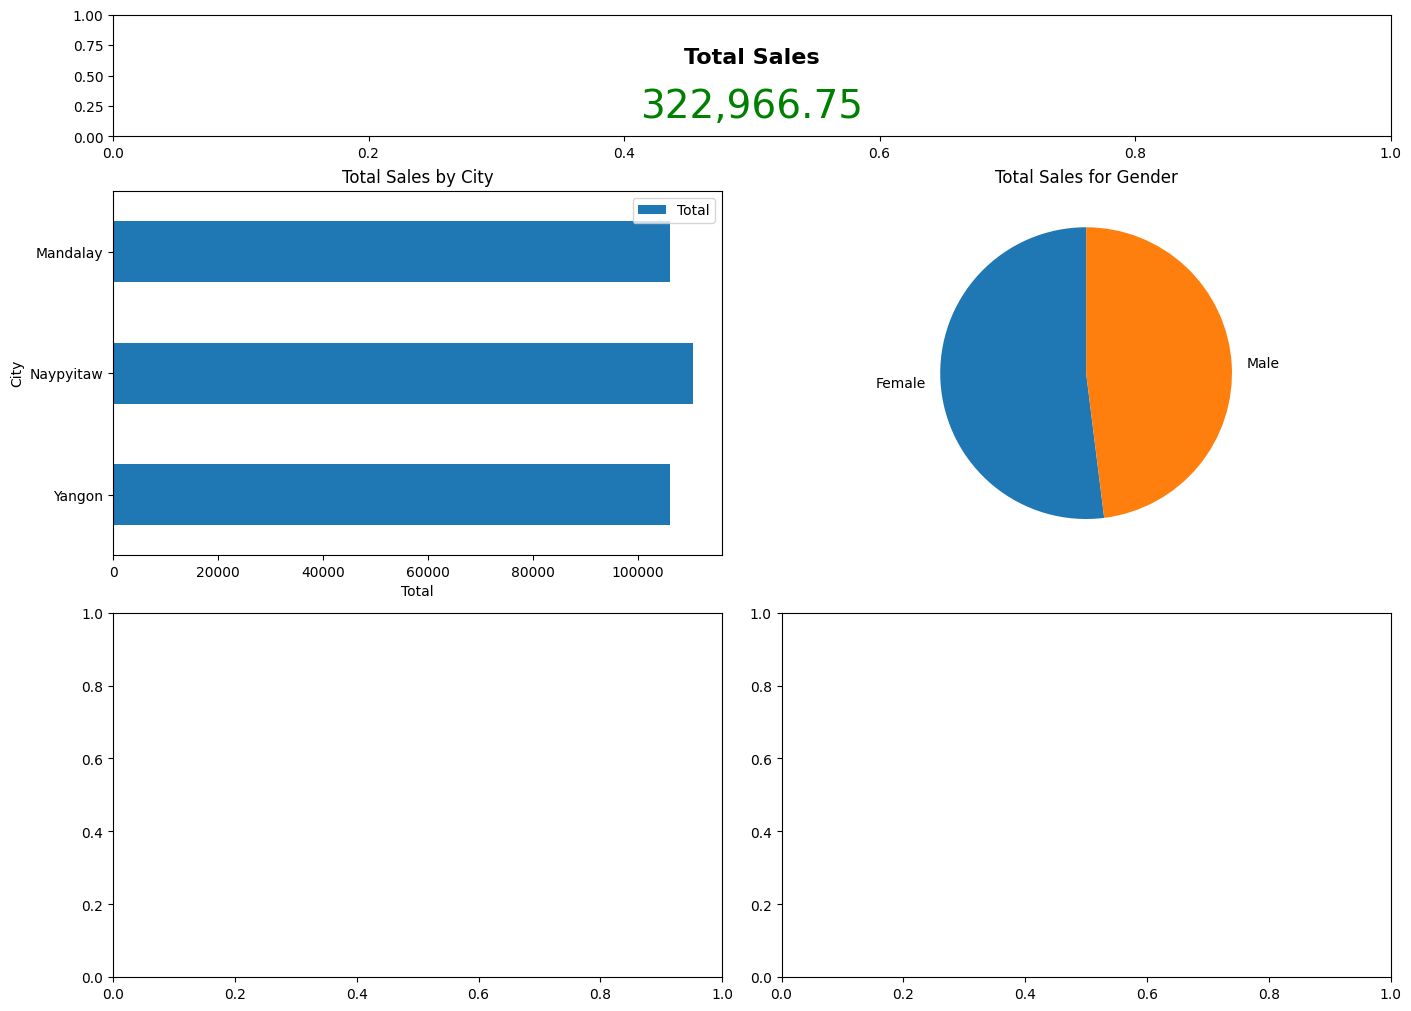

In [32]:
fig

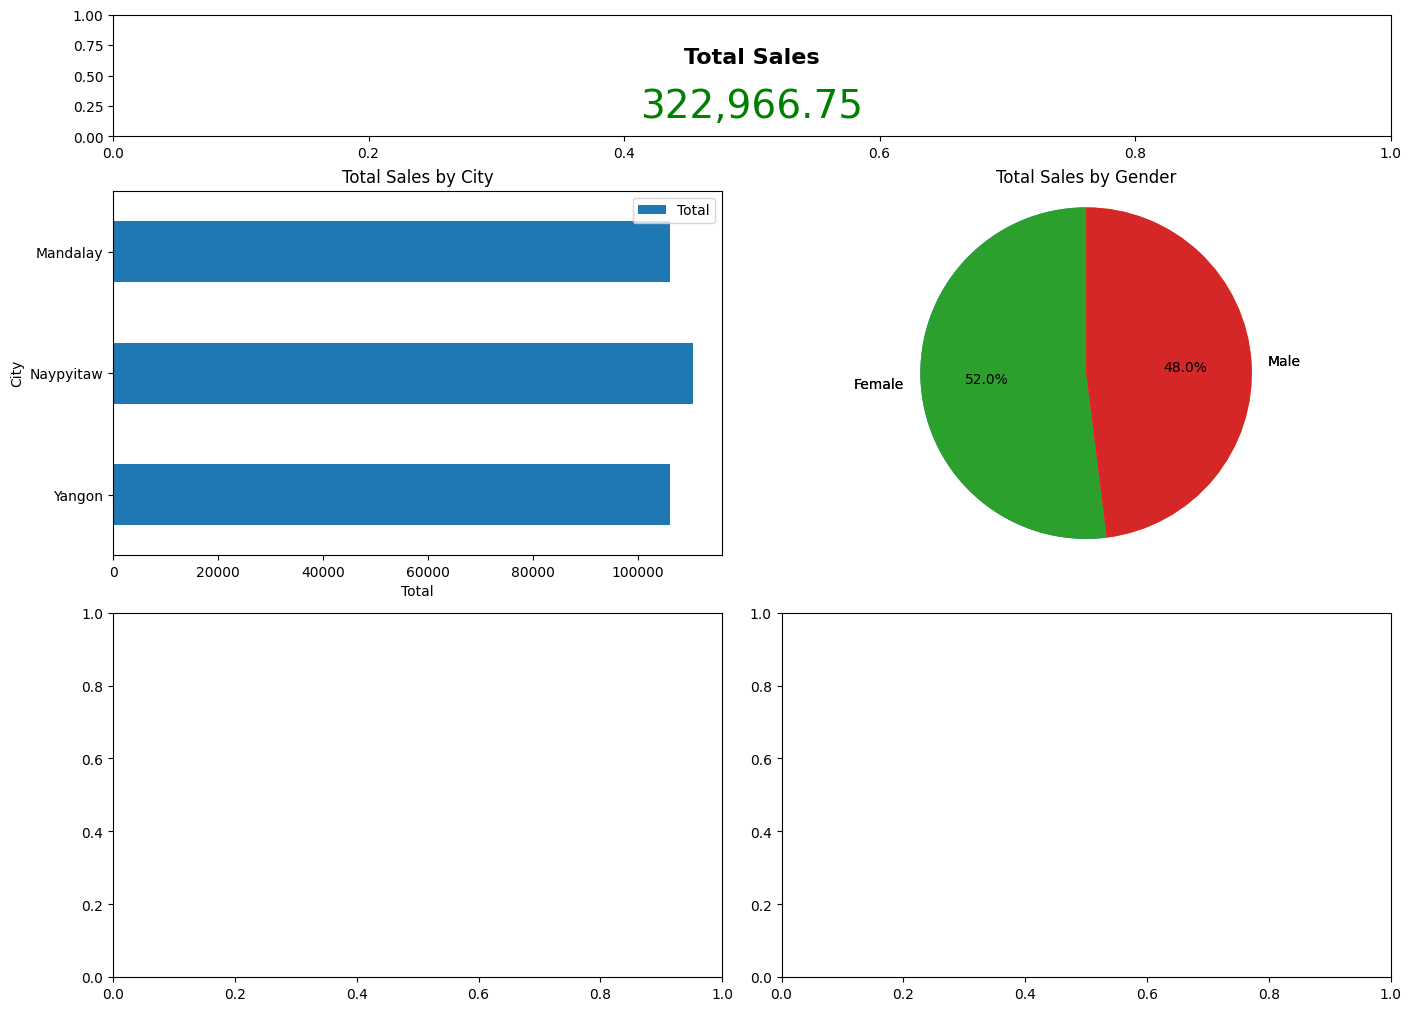

In [33]:
ax_gender.pie(Gsales.values, labels = Gsales.index, autopct = '%1.1f%%', startangle = 90)
ax_gender.set_title('Total Sales by Gender')
ax_gender.axis('equal')
fig

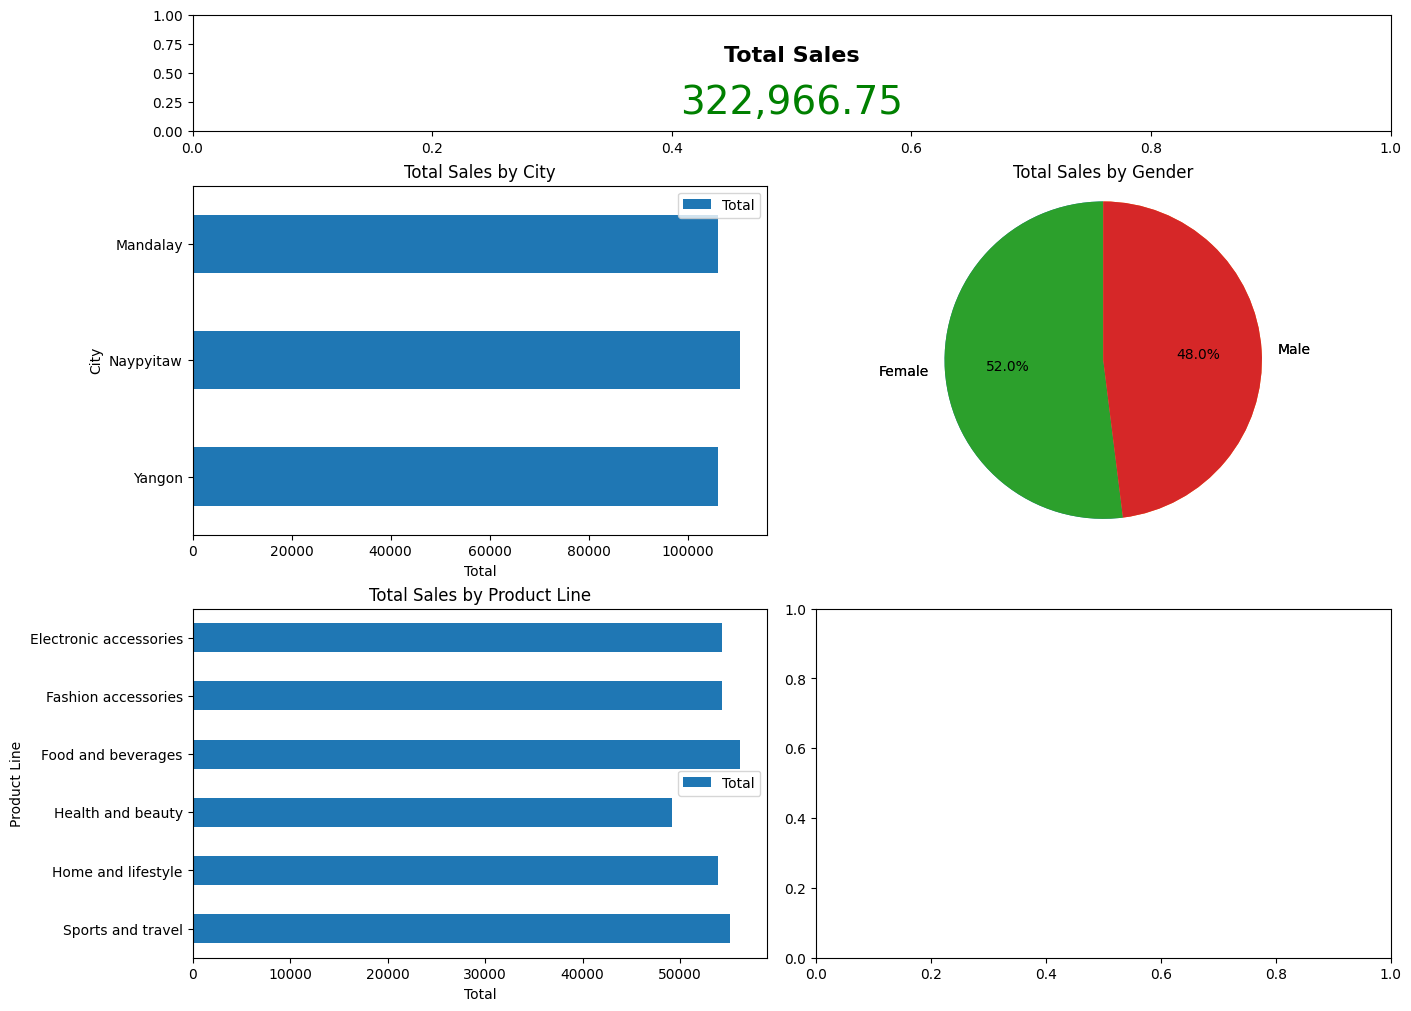

In [34]:
Psales.plot(kind = 'barh', ax = ax_prod)
ax_prod.invert_yaxis()
ax_prod.set_title('Total Sales by Product Line')
ax_prod.set_xlabel('Total')
ax_prod.set_ylabel('Product Line')
ax_prod.margins(x = 0.05)
fig

In [35]:
PMsales.ndim

2

In [36]:
PMsales.pivot_table(index = 'Payment', values = 'Total', aggfunc = 'sum').squeeze()
PMsales.ndim

2

In [37]:
type(PMsales)

pandas.core.frame.DataFrame

In [38]:
#PMsales.set_index('Payment')
PMsales = PMsales.squeeze()
PMsales.ndim

1

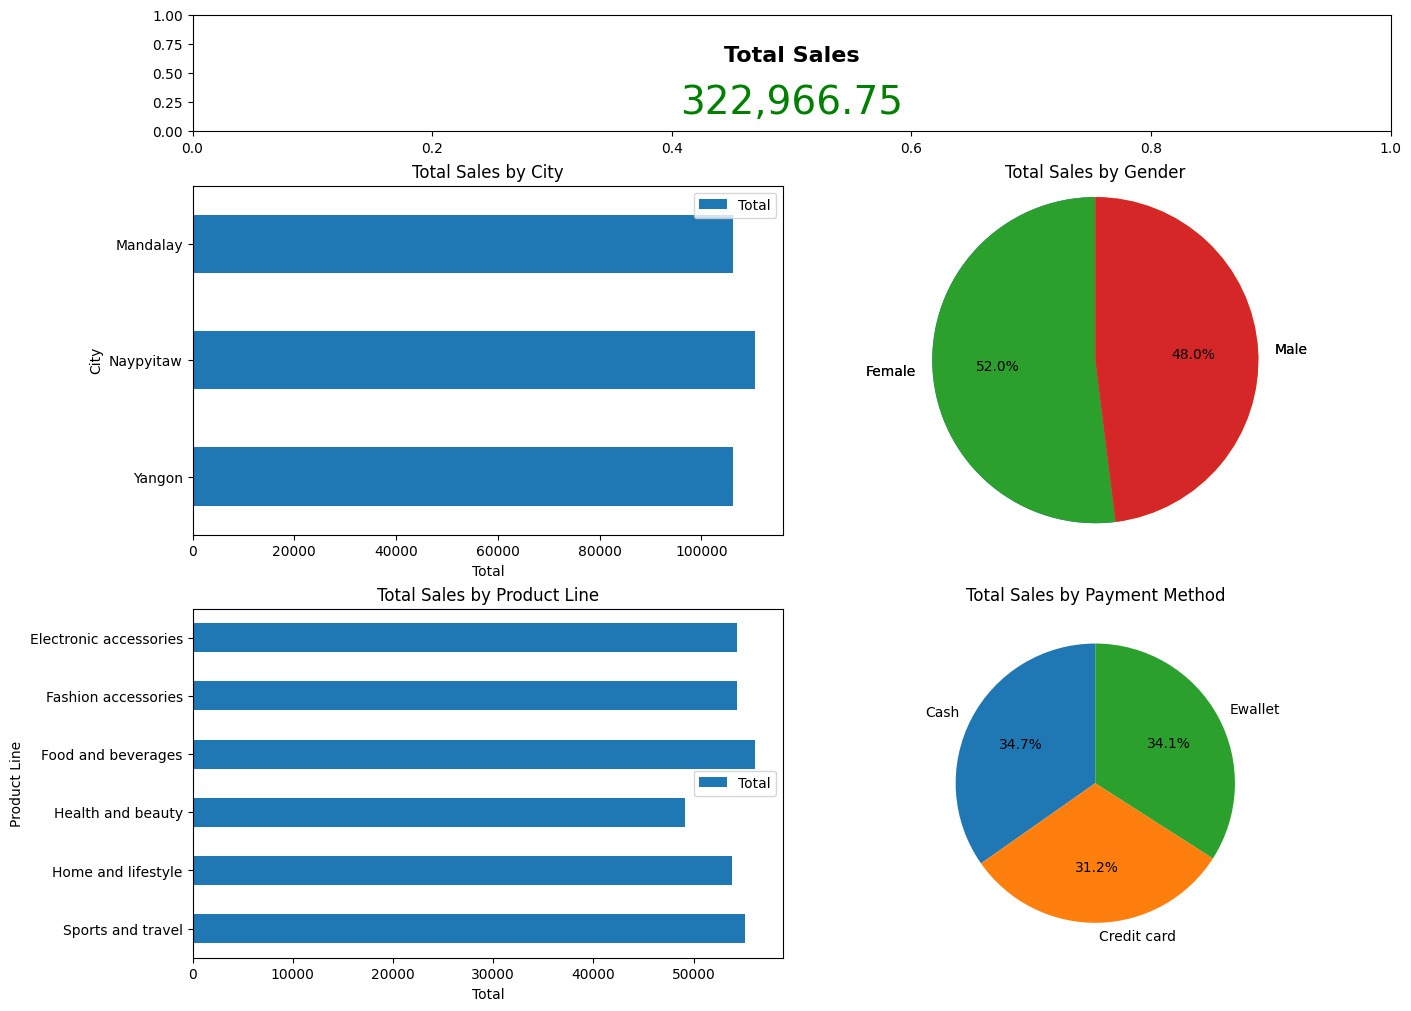

In [39]:
ax_pay.pie(PMsales.values, labels = PMsales.index, startangle = 90, autopct = '%1.1f%%')
ax_pay.set_title('Total Sales by Payment Method')
fig



---



In [42]:
df[['Date', 'Total']]

,Date,Total
0,2019-01-05,548.9715
1,2019-03-08,80.2200
2,2019-03-03,340.5255
3,2019-01-27,489.0480
4,2019-02-08,634.3785
...,...,...
995,2019-01-29,42.3675
996,2019-03-02,1022.4900
997,2019-02-09,33.4320
998,2019-02-22,69.1110


In [46]:
df['monthly'] = pd.to_datetime(df['Date']).dt.month
df['monthly']

,monthly
0,1
1,3
2,3
3,1
4,2
...,...
995,1
996,3
997,2
998,2


In [55]:
dic = {1:'January', 2:'Februaru', 3:'Mart'}
df['monthly'] = df['monthly'].replace(dic)

Tsales = df.groupby('monthly')['Total'].sum().sort_values(ascending = False)
Tsales

,Total
monthly,
January,116291.868
Mart,109455.507
Februaru,97219.374


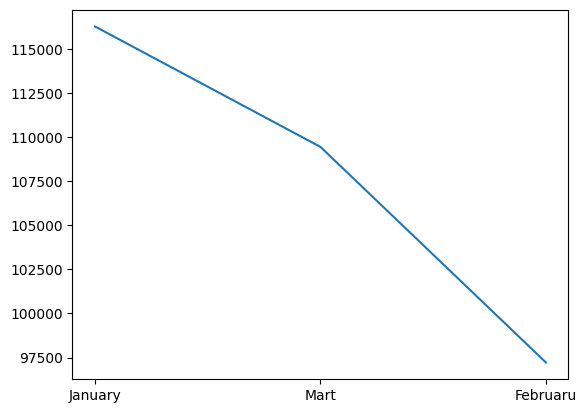

In [62]:
plt.plot(Tsales)




---



In [63]:
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending = False)
product_sales

,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


In [64]:
Psales

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [65]:
payment_cit = df.groupby(['City', 'Payment'])['Invoice ID'].count().unstack(fill_value = 0)
payment_cit

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


In [67]:
df['Date'].head(3)

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03


In [69]:
df['Date'].dt.day_name()

,Date
0,Saturday
1,Friday
2,Sunday
3,Sunday
4,Friday
...,...
995,Tuesday
996,Saturday
997,Saturday
998,Friday


In [71]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_sales = df.groupby(df['Date'].dt.day_name())['Total'].sum().reindex(days)
week_sales

,Total
Date,
Monday,37899.0780
Tuesday,51482.2455
Wednesday,43731.1350
Thursday,45349.2480
Friday,43926.3405
Saturday,56120.8095
Sunday,44457.8925




---



### Total Sales by Product Line

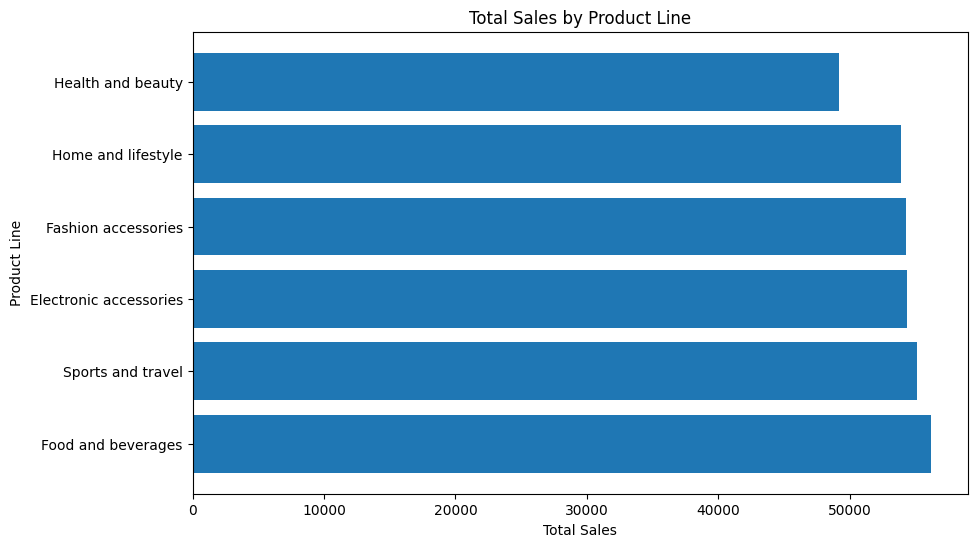

In [74]:
plt.figure(figsize = (10, 6))
plt.barh(product_sales.index, product_sales.values)
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()



---



### Average Rating by Product Line

In [80]:
Prating = df.groupby('Product line')['Rating'].mean().sort_values(ascending = True)
Prating

,Rating
Product line,
Home and lifestyle,6.837500
Sports and travel,6.916265
Electronic accessories,6.924706
Health and beauty,7.003289
Fashion accessories,7.029213
Food and beverages,7.113218


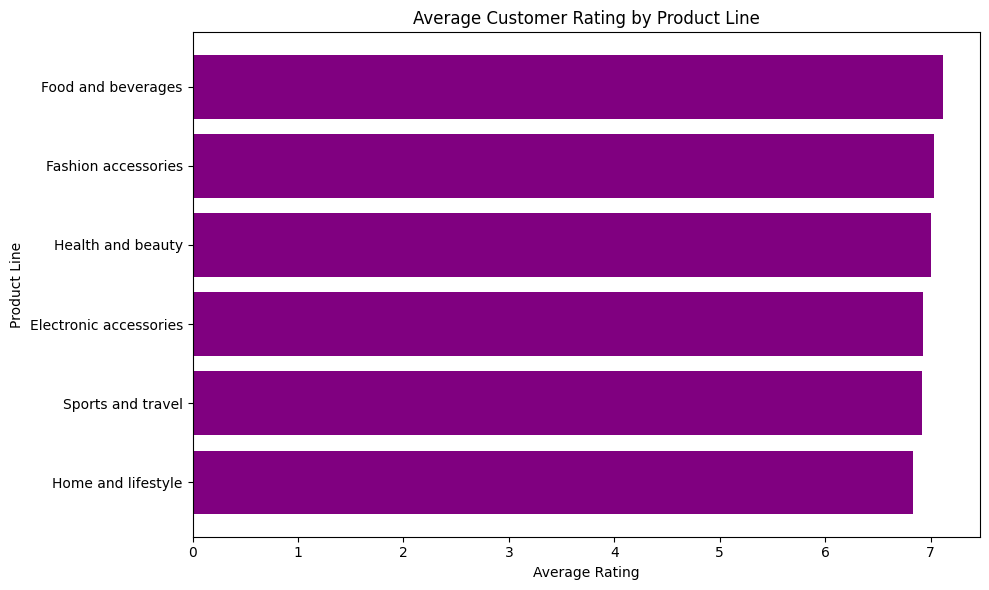

In [81]:
plt.figure(figsize = (10, 6))
plt.barh(Prating.index, Prating.values, color = 'purple')
plt.title('Average Customer Rating by Product Line')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()



---



### Gender Distribution

gender count = gc

In [82]:
gc = df['Gender'].value_counts()
gc

,count
Gender,
Female,501
Male,499


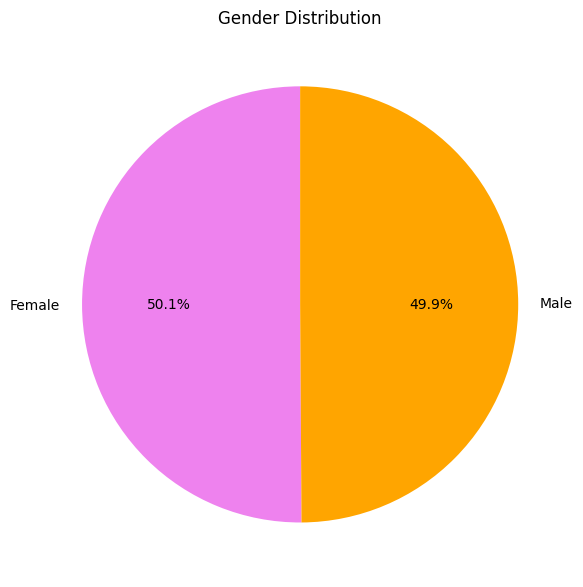

In [91]:
plt.figure(figsize = (6, 6))
plt.pie(gc, labels = df['Gender'].value_counts().index, autopct = '%1.1f%%', startangle = 90, colors = ["violet", "orange"])
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

In [88]:
df['Gender'].value_counts().index

Index(['Female', 'Male'], dtype='object', name='Gender')



---



### Sales Trend Over Time

In [92]:
st = df.groupby('Date')['Total'].sum()
st

,Total
Date,
2019-01-01,4745.1810
2019-01-02,1945.5030
2019-01-03,2078.1285
2019-01-04,1623.6885
2019-01-05,3536.6835
...,...
2019-03-26,1962.5130
2019-03-27,2902.8195
2019-03-28,2229.4020


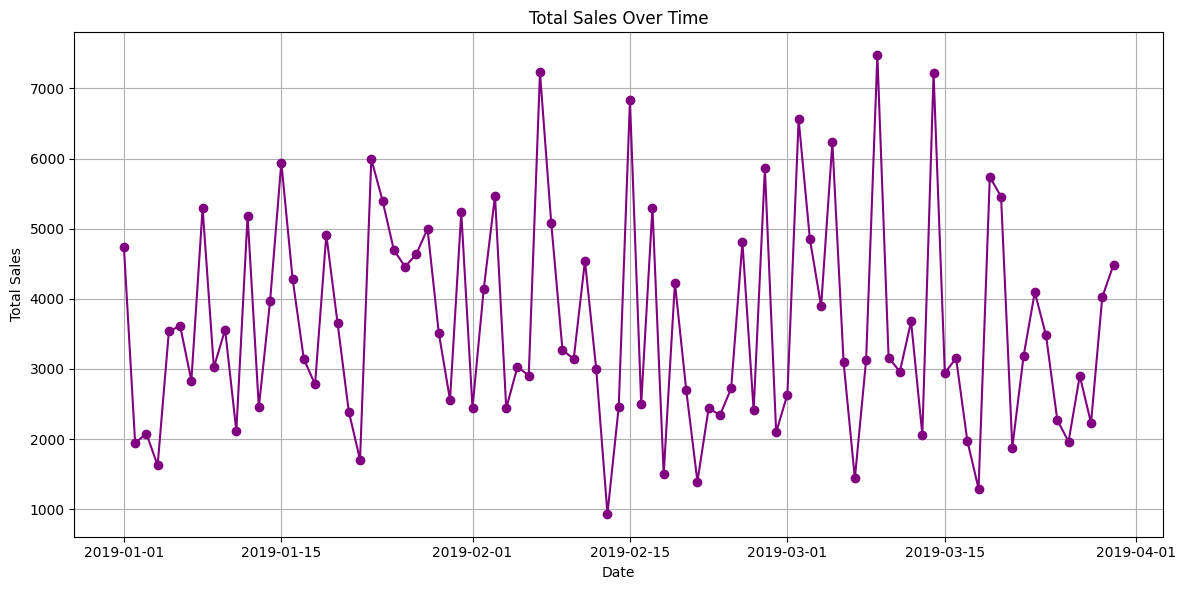

In [94]:
plt.figure(figsize = (12, 6))
plt.plot(st.index, st.values, marker = 'o', linestyle = '-', color = 'purple')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()